# Bubble resize

Cambiaremos el tamaño de nuestras burbujas manteniendo el aspect ratio

Importamos las librerías necesarias

In [2]:
# Importamos API de nuestro modelo en Roboflow
! pip install inference-sdk

A continuación encontraremos nuestro código

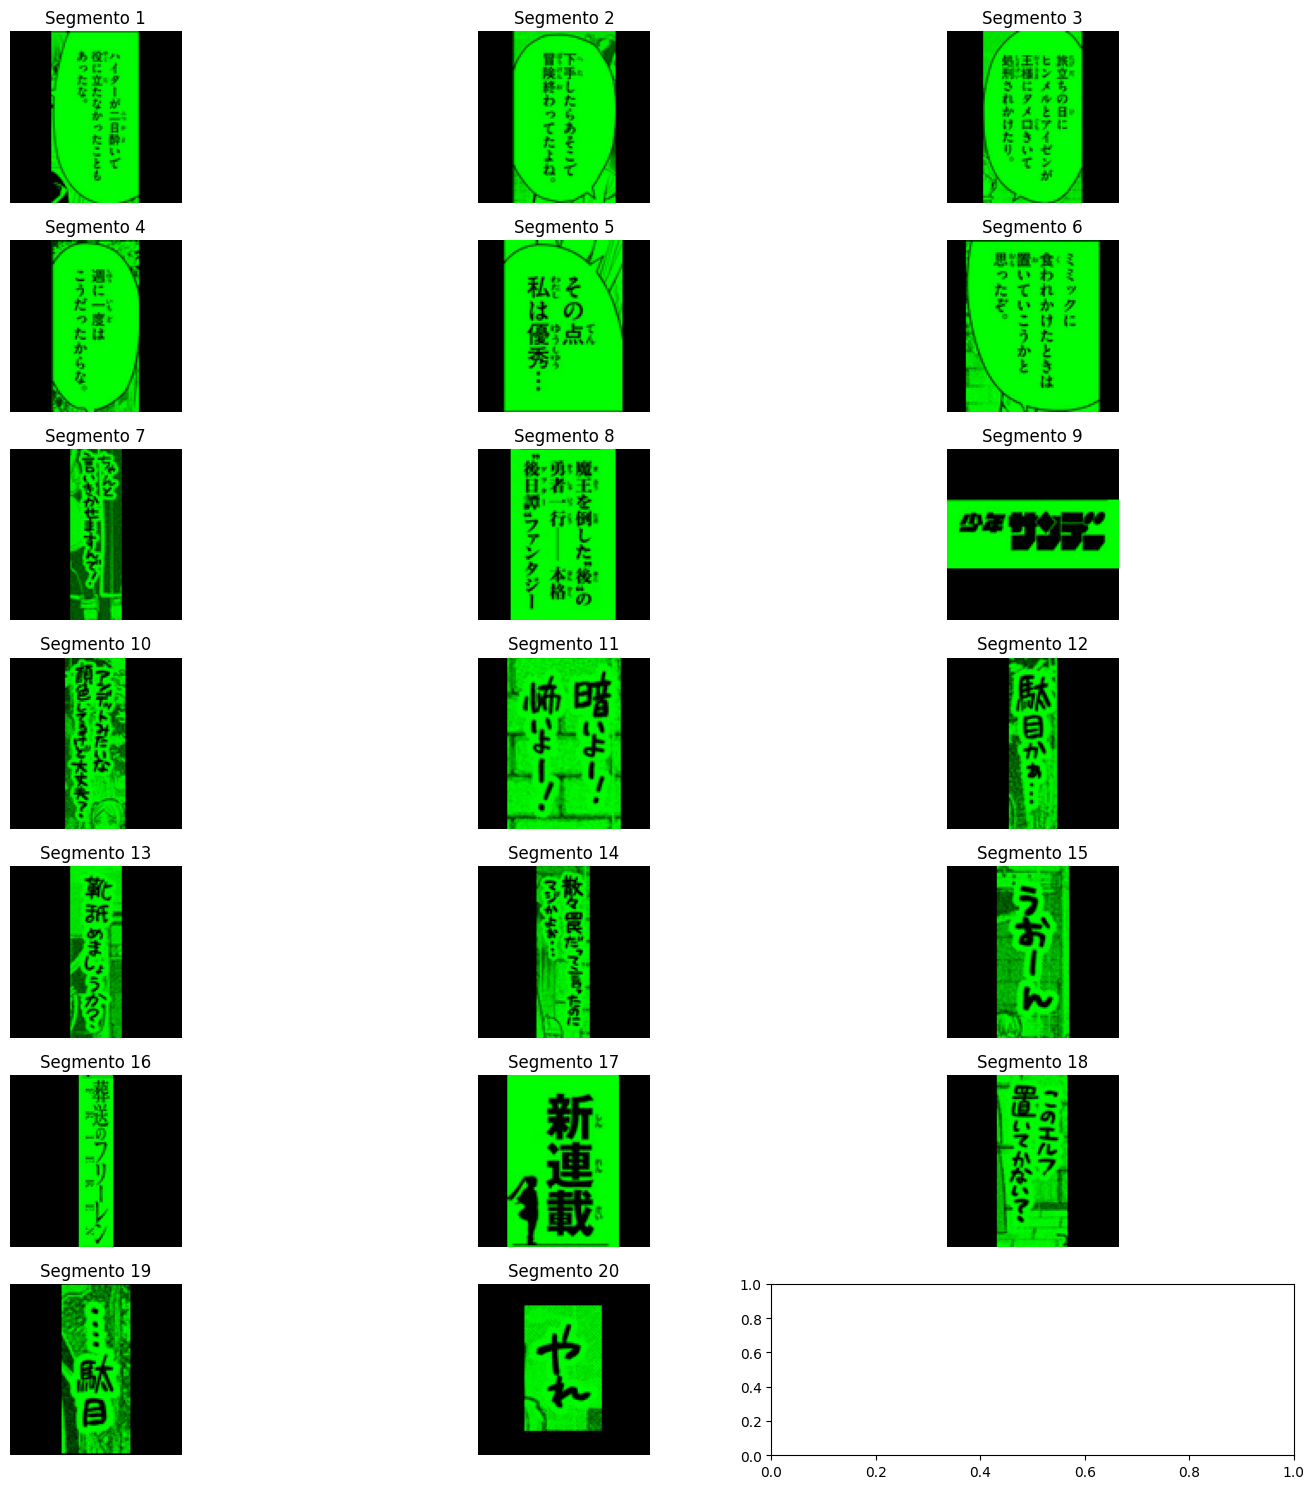

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
from inference_sdk import InferenceHTTPClient

# Define la ruta de la imagen y la carga
img_path = '/home/carol/code/cparran/MOJI/raw_data/0007.jpg'   # Actualiza la ruta de la imagen
img = Image.open(img_path)

# Inicializar el cliente
CLIENT = InferenceHTTPClient(
    api_url="http://detect.roboflow.com",
    api_key="JVuvSUZ2T8BQEtoGVvtv"
)

# Inferir en una imagen local
result = CLIENT.infer(img_path, model_id="manga-text-detection/2")

# Suponiendo que 'segments' es una lista de diccionarios que contiene las coordenadas de los segmentos
# y que cada segmento es un diccionario con las claves 'x', 'y', 'width', 'height'
segments = result['predictions']

# Número de columnas en el grid
num_cols = 3

# Calcular el número de filas necesario en función del número de segmentos y el número de columnas
num_rows = int(np.ceil(len(segments) / num_cols))

# Crear el grid de subgráficos
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Iterar sobre los segmentos y asignar cada uno a un subgráfico
for idx, segment in enumerate(segments):
    row = idx // num_cols
    col = idx % num_cols
    ax = axes[row, col]

    # Dibujar rectángulo alrededor del segmento
    x, y, w, h = segment['x'], segment['y'], segment['width'], segment['height']
    rect = patches.Rectangle((x - w / 2, y - h / 2), w, h, linewidth=2, edgecolor='none', facecolor='none')
    ax.add_patch(rect)

    # Recorta la imagen al cuadro delimitador ajustado
    crop_img = img.crop((max(x - w / 2, 0), max(y - h / 2, 0), x + w / 2, y + h / 2))

    # Convierte la imagen recortada a escala de grises
    crop_img_gray = crop_img.convert('L')

    # Redimensiona la imagen recortada sin deformar (manteniendo el aspecto original)
    target_size = (100, 100)  # Cambia el tamaño deseado
    crop_img_gray.thumbnail(target_size, Image.LANCZOS)

    # Crea una matriz de relleno verde
    green_fill = np.full((target_size[1], target_size[0], 3), 0, dtype=np.uint8)

    # Obtén las coordenadas para insertar la imagen recortada en el centro del área de relleno verde
    top_left_x = (target_size[0] - crop_img_gray.width) // 2
    top_left_y = (target_size[1] - crop_img_gray.height) // 2

    # Inserta la imagen recortada en el área de relleno verde
    green_fill[top_left_y:top_left_y + crop_img_gray.height, top_left_x:top_left_x + crop_img_gray.width, 1] = np.array(crop_img_gray)

    # Muestra la imagen recortada y redimensionada en escala de grises con relleno verde en el subgráfico
    ax.imshow(green_fill, cmap='gray')

    # Ajusta el aspecto del subgráfico
    ax.set_title(f"Segmento {idx + 1}")
    ax.axis('off')

# Ajusta el diseño de la figura y muestra la cuadrícula de subgráficos
plt.tight_layout()
plt.show()


Ahora transformamos nuestro código en una función:

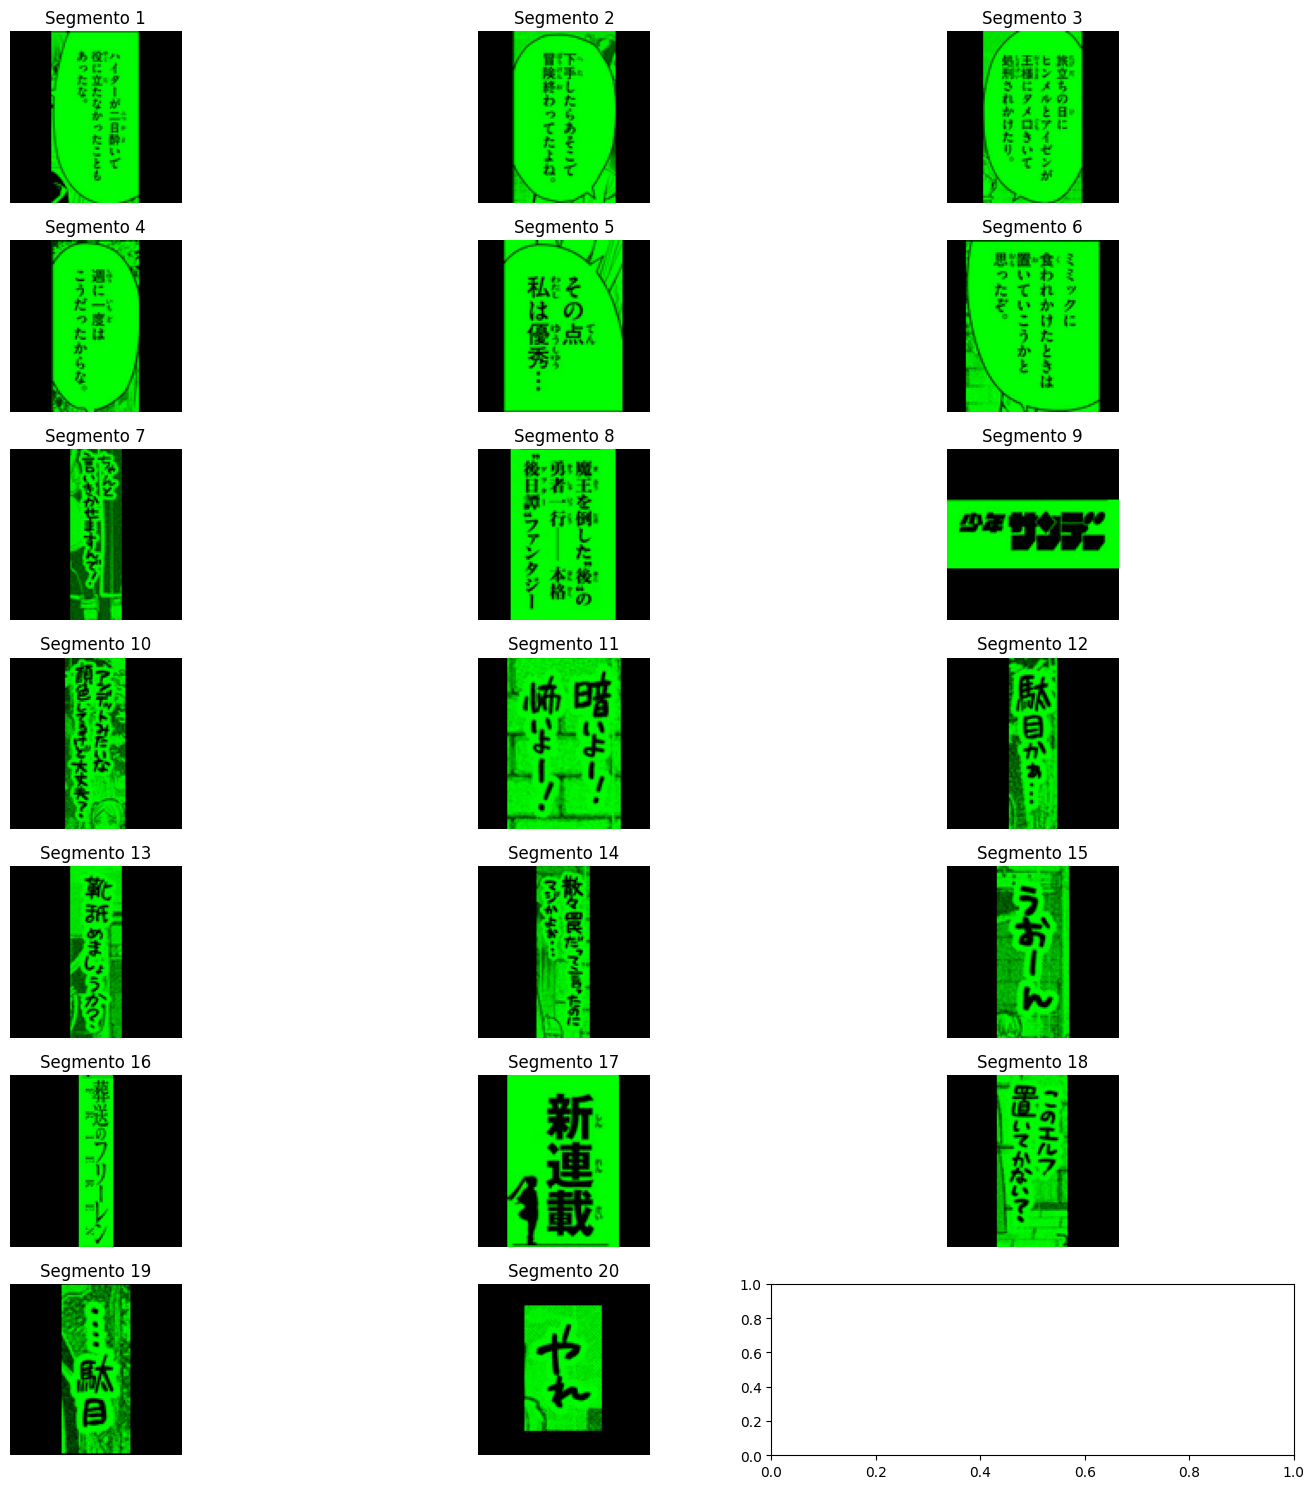

In [12]:
def plot_segments(image_path, num_cols=3, target_size=(100, 100)):
    # Configurar los valores fijos
    model_id = "manga-text-detection/2"  # Reemplaza con tu modelo_id
    api_url = "http://detect.roboflow.com"  # Reemplaza con tu api_url
    api_key = "JVuvSUZ2T8BQEtoGVvtv"  # Reemplaza con tu api_key

    # Cargar la imagen
    img = Image.open(image_path)

    # Inicializar el cliente
    CLIENT = InferenceHTTPClient(api_url=api_url, api_key=api_key)

    # Inferir en la imagen local
    result = CLIENT.infer(image_path, model_id=model_id)

    # Obtener los segmentos del resultado
    segments = result['predictions']

    # Calcular el número de filas necesario en función del número de segmentos y el número de columnas
    num_rows = int(np.ceil(len(segments) / num_cols))

    # Crear el grid de subgráficos
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

    # Iterar sobre los segmentos y asignar cada uno a un subgráfico
    for idx, segment in enumerate(segments):
        row = idx // num_cols
        col = idx % num_cols
        ax = axes[row, col]

        # Dibujar rectángulo alrededor del segmento
        x, y, w, h = segment['x'], segment['y'], segment['width'], segment['height']
        rect = patches.Rectangle((x - w / 2, y - h / 2), w, h, linewidth=2, edgecolor='none', facecolor='none')
        ax.add_patch(rect)

        # Recorta la imagen al cuadro delimitador ajustado
        crop_img = img.crop((max(x - w / 2, 0), max(y - h / 2, 0), x + w / 2, y + h / 2))

        # Convierte la imagen recortada a escala de grises
        crop_img_gray = crop_img.convert('L')

        # Redimensiona la imagen recortada sin deformar (manteniendo el aspecto original)
        crop_img_gray.thumbnail(target_size, Image.LANCZOS)

        # Crea una matriz de relleno verde
        green_fill = np.full((target_size[1], target_size[0], 3), 0, dtype=np.uint8)

        # Obtén las coordenadas para insertar la imagen recortada en el centro del área de relleno verde
        top_left_x = (target_size[0] - crop_img_gray.width) // 2
        top_left_y = (target_size[1] - crop_img_gray.height) // 2

        # Inserta la imagen recortada en el área de relleno verde
        green_fill[top_left_y:top_left_y + crop_img_gray.height, top_left_x:top_left_x + crop_img_gray.width, 1] = np.array(crop_img_gray)

        # Muestra la imagen recortada y redimensionada en escala de grises con relleno verde en el subgráfico
        ax.imshow(green_fill, cmap='gray')

        # Ajusta el aspecto del subgráfico
        ax.set_title(f"Segmento {idx + 1}")
        ax.axis('off')

    # Ajusta el diseño de la figura y muestra la cuadrícula de subgráficos
    plt.tight_layout()
    plt.show()

# Llama a la función con el path de la imagen
plot_segments('/home/carol/code/cparran/MOJI/raw_data/0007.jpg')


Ahora un ejemplo llamando a nuestra función

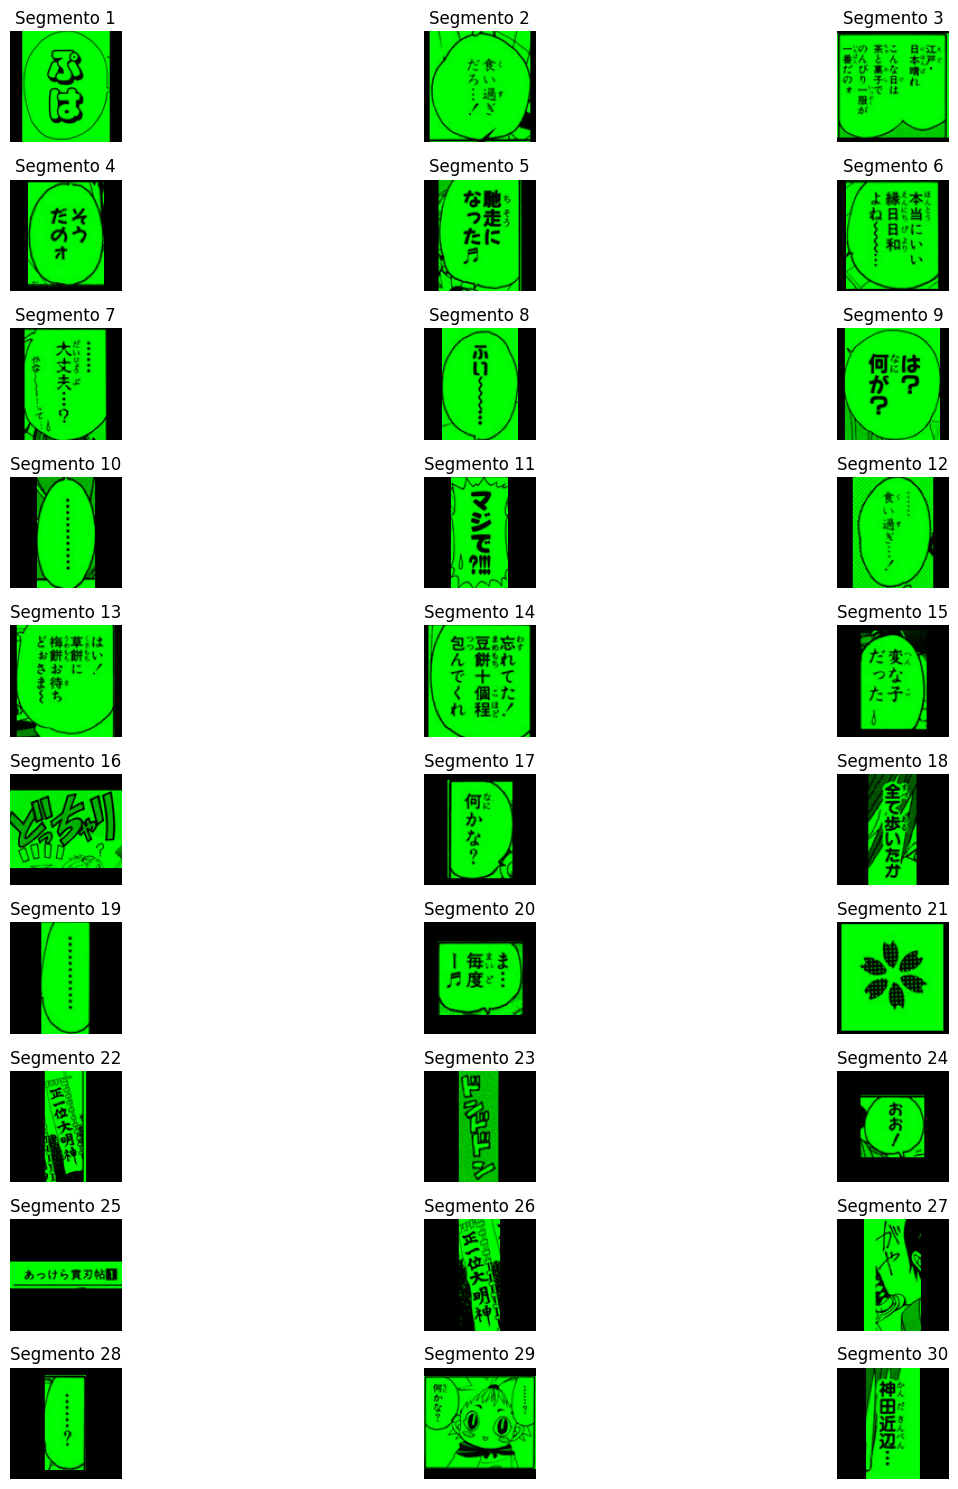

In [17]:
import sys
sys.path.append('/home/carol/code/cparran/MOJI/')
from moji.plot_segments import plot_segments
image_path = '/home/carol/code/cparran/MOJI/raw_data/AkkeraKanjinchou/004.jpg'
plot_segments(image_path) 

# A continuación está disponible el código para iterar en todos los archivos de imagenes contenidos en una carpeta 

Cuidado, demora bastante.

El siguiente código instruye traer un rango de imagenes

Página 1 - Archivo: 043.jpg


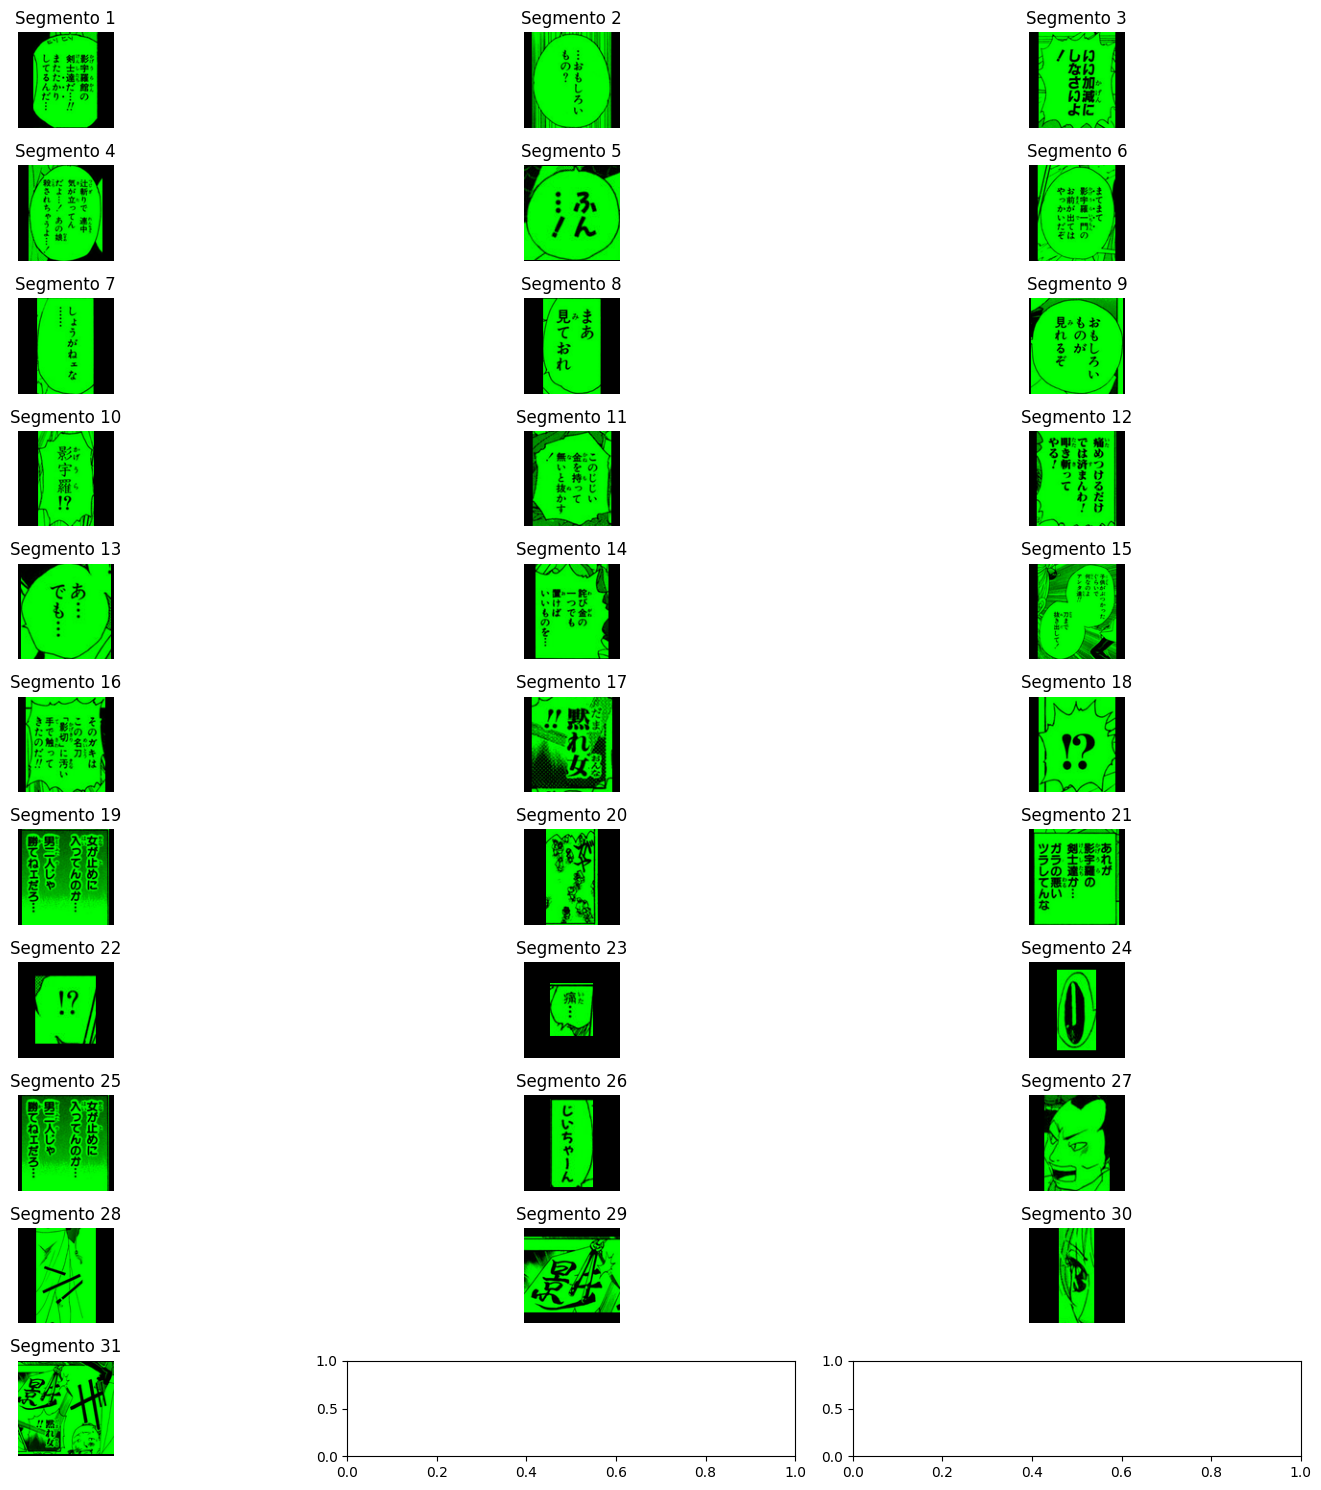

Página 2 - Archivo: 050.jpg


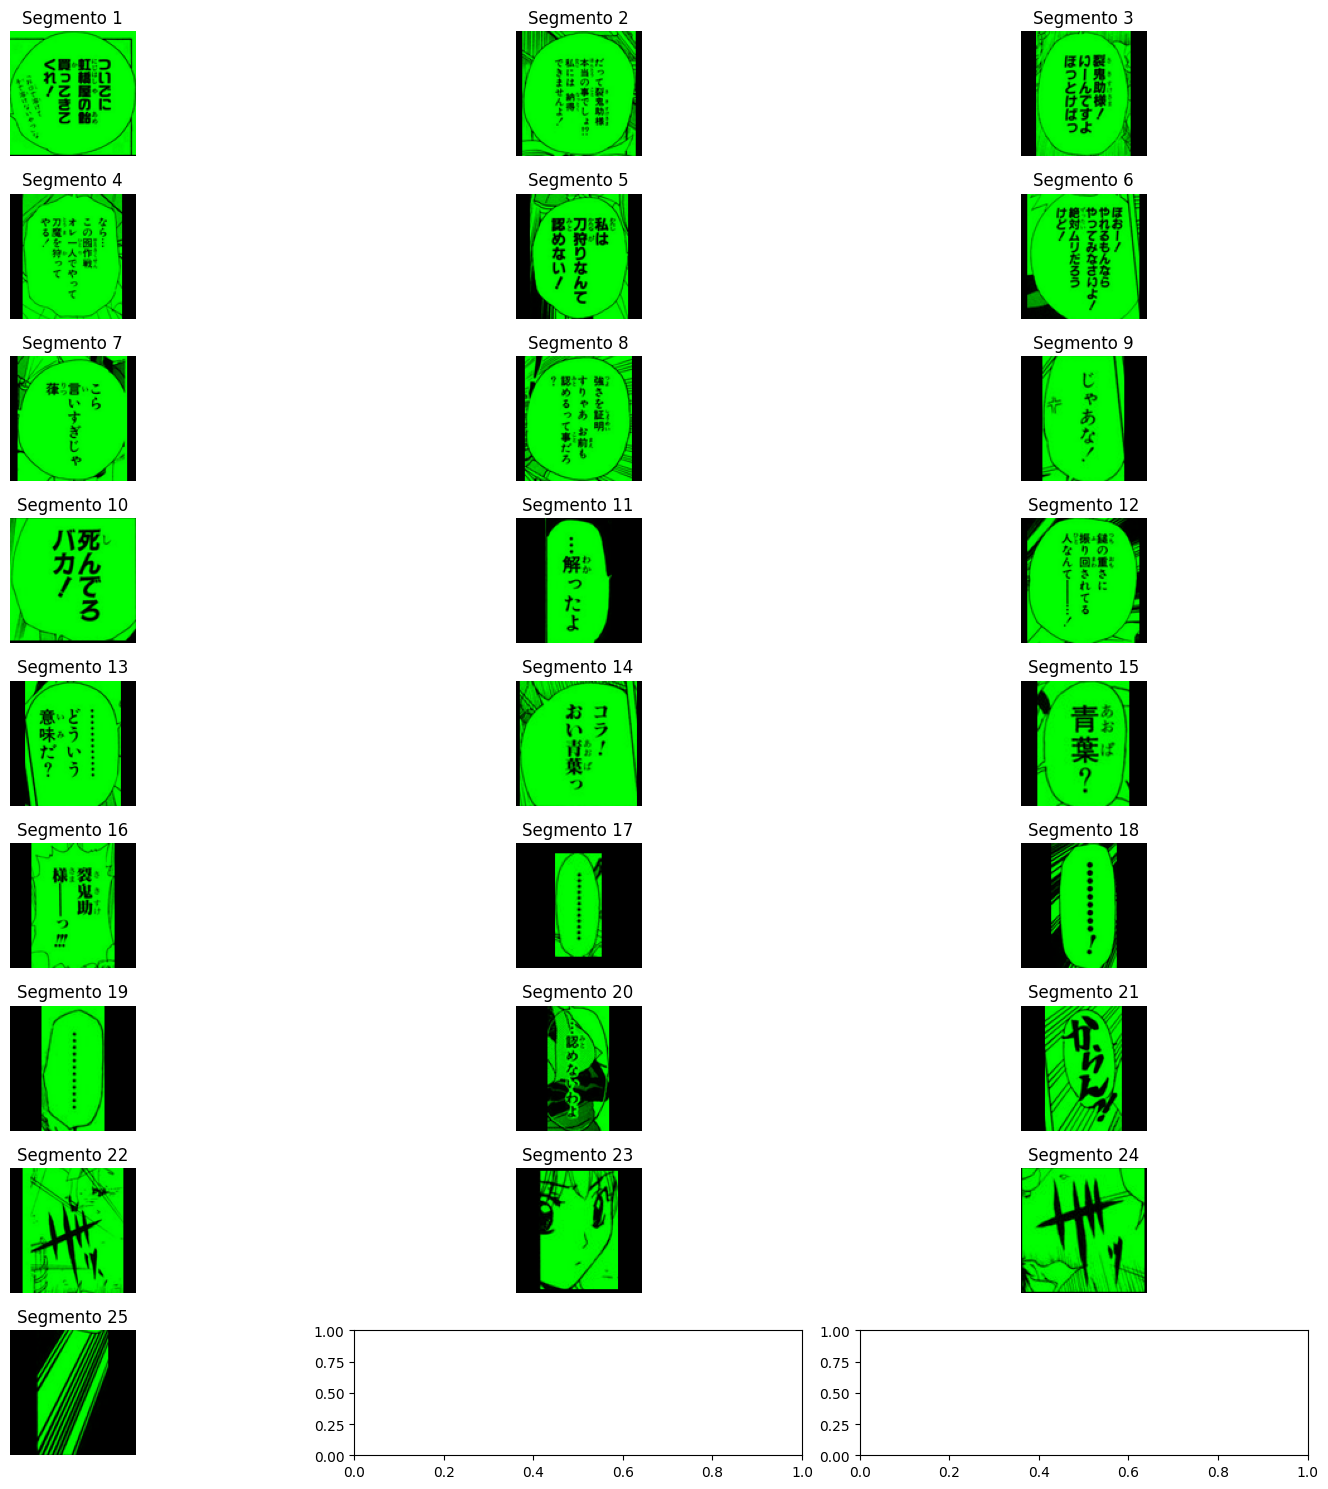

Página 3 - Archivo: 013.jpg


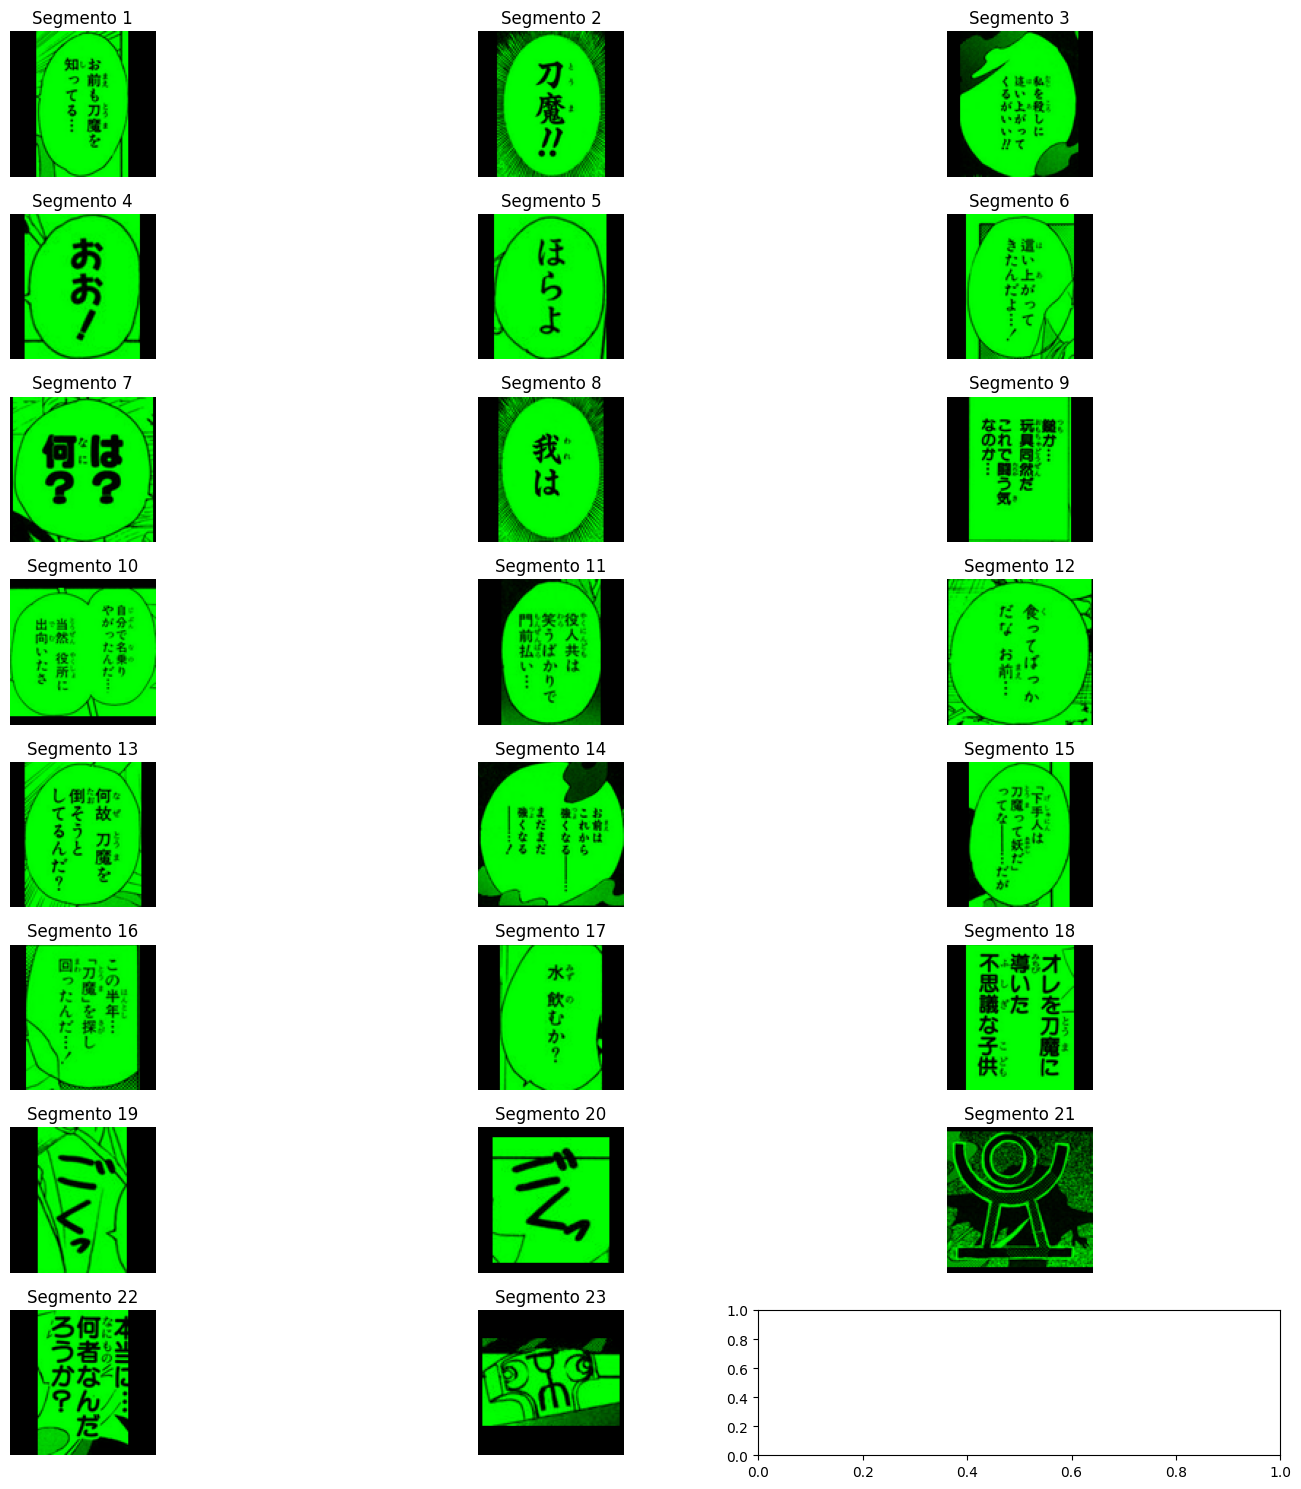

In [20]:
import os
from moji.plot_segments import plot_segments

# Ruta de la carpeta que contiene las imágenes
folder_path = '/home/carol/code/cparran/MOJI/raw_data/AkkeraKanjinchou/'

# Obtener la lista de archivos en la carpeta
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

# Definir el rango de páginas que deseas imprimir (por ejemplo, de la 1 a la 3)
start_page = 1
end_page = 3

# Iterar sobre el rango de páginas y llamar a la función plot_segments
for page_number in range(start_page, min(end_page + 1, len(image_files) + 1)):
    image_file = image_files[page_number - 1]
    image_path = os.path.join(folder_path, image_file)
    print(f"Página {page_number} - Archivo: {image_file}")
    plot_segments(image_path)

El siguiente código itera por todas las imagenes contenidas en una misma carpeta

**<span style="color:red">Usar con precaución, demora bastante.</span>**

In [ ]:
import os
from moji.plot_segments import plot_segments

# Ruta de la carpeta que contiene las imágenes
folder_path = '/home/carol/code/cparran/MOJI/raw_data/AkkeraKanjinchou/'

# Obtener la lista de archivos en la carpeta
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

# Iterar sobre cada archivo y llamar a la función plot_segments
for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    print(f"Archivo: {image_file}")
    plot_segments(image_path)